# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [118]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def value(self):
        if self.rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self.rank == 'Ace':
            return 11
        return self.rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    def __init__(self, num_decks=6):
        self.suits = ['Hearts', 'Clubs', 'Spades', 'Diamonds']
        self.ranks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 'Jack', 'Queen', 'King', 'Ace']
        self.num_decks = num_decks
        self.cards = []
        self.build_deck()
        self.shuffle()
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)

    def build_deck(self):
        self.cards = [Card(suit, rank)
                      for i in range(self.num_decks)
                      for suit in self.suits
                      for rank in self.ranks]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) == 0 or len(self.cards) <= self.plastic_card_index:
            if not self.quiet:
                print("🔄 Plastic card reached or deck empty – reshuffling deck.")
            self._build_deck()
            self.shuffle()
            self.plastic_card_index = random.randint(0, len(self.cards) - 1)

        return self.cards.pop()


deck = Deck()
for i in range(5):
    print(deck.draw_card())


8 of Spades
9 of Clubs
4 of Hearts
King of Spades
Jack of Spades


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [119]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def value(self):
        if self.rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self.rank == 'Ace':
            return 11
        return self.rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6, quiet = False):
        self.suits = ['Hearts', 'Clubs', 'Spades', 'Diamonds']
        self.ranks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 'Jack', 'Queen', 'King', 'Ace']
        self.num_decks = num_decks
        self.quiet = quiet
        self.cards = []
        self.build_deck()
        self.shuffle()
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)

    def build_deck(self):
        self.cards = [Card(suit, rank)
                      for i in range(self.num_decks)
                      for suit in self.suits
                      for rank in self.ranks]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) == 0 or len(self.cards) <= self.plastic_card_index:
            if not self.quiet:
                print("Plastic card reached or deck empty – reshuffling deck.")
            self.build_deck()
            self.shuffle()
            self.plastic_card_index = random.randint(0, len(self.cards) - 1)

        return self.cards.pop()

class Hand:
    def __init__(self):
        self.cards = []

    def add(self, card):
        self.cards.append(card)

    def value(self):
        total = sum(card.value() for card in self.cards)
        aces = sum(1 for card in self.cards if card.rank == 'Ace')
        while total > 21 and aces:
            total -= 10
            aces -= 1
        return total

    def is_busted(self):
        return self.value() > 21

    def __repr__(self):
        return ', '.join(str(card) for card in self.cards)


#Question 4: Player and Human dealer
class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def play(self, deck):
        while self.hand.value() < 17:
            self.hand.add(deck.draw_card())

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play(self, deck):
        while self.hand.value() < 17:
            self.hand.add(deck.draw_card())

class BlackJackGame:
    def __init__(self, num_players, rounds):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [Player(f"Player{i+1}") for i in range(num_players)]
        self.rounds = rounds

    def play(self):
        for r in range(1, self.rounds + 1):
            print(f"\n--- Round {r} ---")
            self.play_round()

    def play_round(self):
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

        for i in range(2):
            for player in self.players:
                player.hand.add(self.deck.draw_card())
            self.dealer.hand.add(self.deck.draw_card())
            print(f"Dealer shows: {self.dealer.hand.cards[0]}")

        for player in self.players:
            player.play(self.deck)
            print(f"{player.name}: {player.hand} (Value: {player.hand.value()})")

        self.dealer.play(self.deck)
        dealer_value = self.dealer.hand.value()
        print(f"Dealer: {self.dealer.hand} (Value: {dealer_value})")

        for player in self.players:
            p_val = player.hand.value()
            if player.hand.is_busted():
                player.chips -= 10
                print(f"{player.name} busted. -10 chips")
            elif self.dealer.hand.is_busted() or p_val > dealer_value:
                player.chips += 10
                print(f"{player.name} wins! +10 chips")
            elif p_val < dealer_value:
                player.chips -= 10
                print(f"{player.name} loses. -10 chips")
            else:
                print(f"{player.name} pushes. No change.")
        for player in self.players:
            print(f"{player.name}: {player.chips} chips")

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [120]:
game = BlackJackGame(num_players=3, rounds=3)
game.play()


--- Round 1 ---
Dealer shows: Ace of Clubs
Dealer shows: Ace of Clubs
Player1: 9 of Diamonds, 2 of Diamonds, Ace of Spades, 5 of Hearts (Value: 17)
Player2: 7 of Clubs, 4 of Hearts, Jack of Clubs (Value: 21)
Player3: 5 of Spades, 8 of Spades, King of Diamonds (Value: 23)
Dealer: Ace of Clubs, 5 of Spades, Queen of Spades, 9 of Diamonds (Value: 25)
Player1 wins! +10 chips
Player2 wins! +10 chips
Player3 busted. -10 chips
Player1: 1010 chips
Player2: 1010 chips
Player3: 990 chips

--- Round 2 ---
Dealer shows: 8 of Diamonds
Dealer shows: 8 of Diamonds
Player1: 2 of Diamonds, 4 of Spades, 8 of Hearts, 3 of Diamonds (Value: 17)
Player2: 3 of Spades, Ace of Diamonds, 3 of Clubs (Value: 17)
Player3: 2 of Clubs, King of Clubs, 10 of Clubs (Value: 22)
Dealer: 8 of Diamonds, 9 of Diamonds (Value: 17)
Player1 pushes. No change.
Player2 pushes. No change.
Player3 busted. -10 chips
Player1: 1010 chips
Player2: 1010 chips
Player3: 980 chips

--- Round 3 ---
Dealer shows: 2 of Hearts
Dealer shows: 

6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [121]:
class NewPlayer(Player):
    def __init__(self, name, threshold=0, chips=1000):
        super().__init__(name, chips)
        self.threshold = threshold
        self.running_count = 0

    def card_count_value(self, card):
        if isinstance(card.rank, int) and 2 <= card.rank <= 6:
            return +1
        elif card.rank in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            return -1
        return 0

    def update_count(self, visible_cards):
        for card in visible_cards:
            self.running_count += self.card_count_value(card)

    def play(self, deck, visible_cards):
        self.update_count(visible_cards)
        while self.hand.value() < 17 and self.running_count <= self.threshold:
            self.hand.add(deck.draw_card())

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [122]:
class NewTestGame:
    def __init__(self, threshold=0, rounds=50, verbose=False):
        self.deck = Deck(quiet = not verbose)
        self.dealer = Dealer()
        self.new_player = NewPlayer("CardCounter", threshold)
        self.other_players = [Player(f"Player{i+1}") for i in range(3)]
        self.players = [self.new_player] + self.other_players
        self.rounds = rounds
        self.verbose = verbose

    def play(self):
        for r in range(1, self.rounds + 1):
            if self.new_player.chips <= 0:
                if self.verbose:
                    print("CardCounter is out of chips. Ending game.")
                break
            if self.verbose:
                print(f"\n--- Round {r} ---")
            self.play_round()

        return self.new_player.chips

    def play_round(self):
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()
        for i in range(2):
            for player in self.players:
                player.hand.add(self.deck.draw_card())
            self.dealer.hand.add(self.deck.draw_card())
        visible_cards = [c for p in self.players for c in p.hand.cards] + [self.dealer.hand.cards[0]]
        for player in self.players:
            if isinstance(player, NewPlayer):
                player.play(self.deck, visible_cards)
            else:
                player.play(self.deck)

        self.dealer.play(self.deck)
        dealer_value = self.dealer.hand.value()

        for player in self.players:
            value = player.hand.value()
            if player.hand.is_busted():
                player.chips -= 10
            elif self.dealer.hand.is_busted() or value > dealer_value:
                player.chips += 10
            elif value < dealer_value:
                player.chips -= 10


# new test game
test_game = NewTestGame(threshold=0, rounds=50, verbose=True)
final_chips = test_game.play()
print(f"\n Final chip count for CardCounter: {final_chips}")



--- Round 1 ---

--- Round 2 ---

--- Round 3 ---

--- Round 4 ---

--- Round 5 ---

--- Round 6 ---

--- Round 7 ---

--- Round 8 ---

--- Round 9 ---

--- Round 10 ---

--- Round 11 ---

--- Round 12 ---

--- Round 13 ---

--- Round 14 ---
Plastic card reached or deck empty – reshuffling deck.

--- Round 15 ---

--- Round 16 ---

--- Round 17 ---

--- Round 18 ---

--- Round 19 ---

--- Round 20 ---

--- Round 21 ---

--- Round 22 ---
Plastic card reached or deck empty – reshuffling deck.

--- Round 23 ---

--- Round 24 ---

--- Round 25 ---

--- Round 26 ---

--- Round 27 ---

--- Round 28 ---

--- Round 29 ---

--- Round 30 ---

--- Round 31 ---

--- Round 32 ---

--- Round 33 ---

--- Round 34 ---

--- Round 35 ---

--- Round 36 ---

--- Round 37 ---

--- Round 38 ---

--- Round 39 ---

--- Round 40 ---

--- Round 41 ---

--- Round 42 ---

--- Round 43 ---

--- Round 44 ---
Plastic card reached or deck empty – reshuffling deck.

--- Round 45 ---

--- Round 46 ---

--- Round 47 --

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


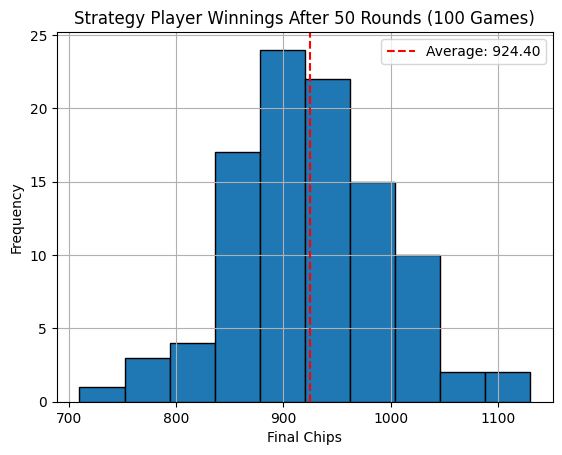

Average winnings per game: 924.40
Standard deviation of winnings: 71.73
Probability of net winning after 50 rounds: 0.14
Average winnings per round: -1.51


In [123]:
import matplotlib.pyplot as plt
import numpy as np

num_games = 100
final_chips_list = []

for i in range(num_games):
    test_game = NewTestGame(threshold=0, rounds=50, verbose=False)
    final_chips_list.append(test_game.play())

plt.hist(final_chips_list, bins=10, edgecolor='black')
plt.title("Strategy Player Winnings After 50 Rounds (100 Games)")
plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.axvline(np.mean(final_chips_list), color='red', linestyle='--', label=f"Average: {np.mean(final_chips_list):.2f}")
plt.legend()
plt.grid(True)
plt.show()

print(f"Average winnings per game: {np.mean(final_chips_list):.2f}")
print(f"Standard deviation of winnings: {np.std(final_chips_list):.2f}")
print(f"Probability of net winning after 50 rounds: {np.mean([1 if chips > 1000 else 0 for chips in final_chips_list]) :.2f}")

average_winnings_per_round = ((np.mean(final_chips_list)) - 1000) / 50
print(f"Average winnings per round: {average_winnings_per_round:.2f}")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [124]:
def simulate_strategy_games(threshold=0, num_games=100, rounds_per_game=50):
    final_chips = []
    for _ in range(num_games):
        game = NewTestGame(threshold=threshold, rounds=rounds_per_game)
        final = game.play()
        final_chips.append(final)
    return final_chips

threshold_values = [-4, -2, 0, 1, 2]
results_summary = []

for threshold in threshold_values:
    chips = simulate_strategy_games(threshold=threshold)
    avg = np.mean(chips)
    std = np.std(chips)
    win_rate = np.mean([1 if c > 1000 else 0 for c in chips])
    results_summary.append((threshold, avg, std, win_rate))

df = pd.DataFrame(results_summary, columns=["Threshold", "Average Chips", "Std Dev", "Win Probability"])
print(df)


   Threshold  Average Chips    Std Dev  Win Probability
0         -4          917.7  63.084943             0.13
1         -2          907.4  65.781760             0.09
2          0          908.5  64.410791             0.09
3          1          914.5  70.276241             0.09
4          2          910.7  67.487110             0.08


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

In [125]:
class VeteranPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name, chips)
        self.count = 0

    def card_count_value(self, card):
        if isinstance(card.rank, int) and 2 <= card.rank <= 6:
            return +1
        elif card.rank in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            return -1
        return 0

    def update_count(self, visible_cards):
        self.count = sum(self.card_count_value(card) for card in visible_cards)

    def play(self, deck, visible_cards):
        self.update_count(visible_cards)

        while True:
            hand_val = self.hand.value()
            if hand_val < 14:
                self.hand.add(deck.draw_card())
            elif 14 <= hand_val < 17:
                if self.count < 0:
                    self.hand.add(deck.draw_card())
                else:
                    break
            else:
                break

In [126]:
class VeteranTestGame:
    def __init__(self, rounds=50):
        self.deck = Deck(quiet=True)
        self.dealer = Dealer()
        self.veteran_player = VeteranPlayer("VeteranPlayer")
        self.other_players = [Player(f"Player{i+1}") for i in range(3)]
        self.players = [self.veteran_player] + self.other_players
        self.rounds = rounds

    def play(self):
        for _ in range(self.rounds):
            if self.veteran_player.chips <= 0:
                break
            self.play_round()
        return self.veteran_player.chips

    def play_round(self):
        self.dealer.hand = Hand()
        for p in self.players:
            p.hand = Hand()

        for i in range(2):
            for p in self.players:
                p.hand.add(self.deck.draw_card())
            self.dealer.hand.add(self.deck.draw_card())

        visible = [c for p in self.players for c in p.hand.cards] + [self.dealer.hand.cards[0]]

        for p in self.players:
            if isinstance(p, VeteranPlayer):
                p.play(self.deck, visible)
            else:
                p.play(self.deck)

        self.dealer.play(self.deck)
        d_val = self.dealer.hand.value()

        for p in self.players:
            val = p.hand.value()
            if p.hand.is_busted():
                p.chips -= 10
            elif self.dealer.hand.is_busted() or val > d_val:
                p.chips += 10
            elif val < d_val:
                p.chips -= 10


In [127]:
counting_results = [NewTestGame(threshold=0).play() for i in range(100)]
veteran_results = [VeteranTestGame().play() for i in range(100)]

print("Counting Strategy Average:", np.mean(counting_results))
print("Veteran Strategy Average:", np.mean(veteran_results))

Counting Strategy Average: 907.8
Veteran Strategy Average: 968.9


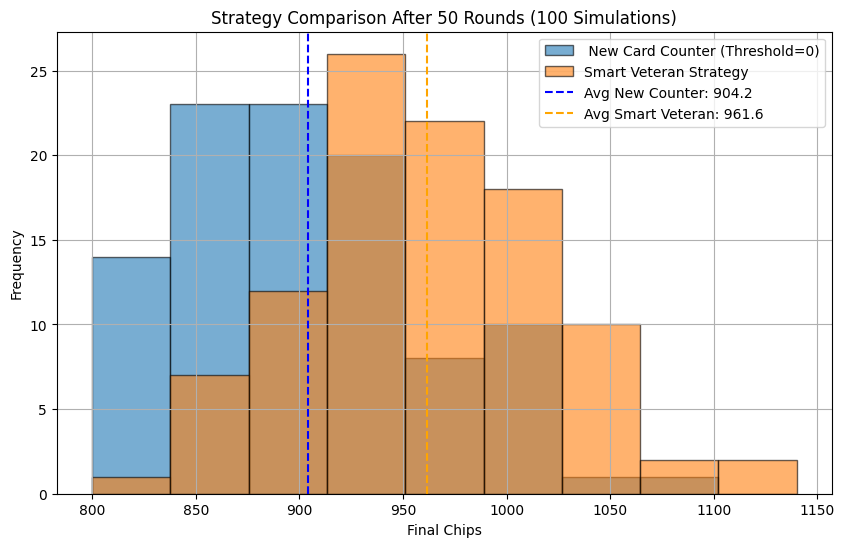

In [128]:
counting_results = [NewTestGame(threshold=0).play() for i in range(100)]
smart_results = [VeteranTestGame().play() for i in range(100)]

counting_array = np.array(counting_results)
smart_array = np.array(smart_results)

bins = np.linspace(min(min(counting_array), min(smart_array)),
                   max(max(counting_array), max(smart_array)), 10)

plt.figure(figsize=(10, 6))

plt.hist(counting_array, bins, alpha=0.6, label=' New Card Counter (Threshold=0)', edgecolor='black')
plt.hist(smart_array, bins, alpha=0.6, label='Smart Veteran Strategy', edgecolor='black')

plt.axvline(np.mean(counting_array), color='blue', linestyle='dashed', linewidth=1.5, label=f'Avg New Counter: {np.mean(counting_array):.1f}')
plt.axvline(np.mean(smart_array), color='orange', linestyle='dashed', linewidth=1.5, label=f'Avg Smart Veteran: {np.mean(smart_array):.1f}')


plt.title("Strategy Comparison After 50 Rounds (100 Simulations)")
plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
